#Könyvtárak

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
%matplotlib inline

In [ ]:
from google.colab.data_table import DataTable
DataTable.max_columns = 100
DataTable.max_rows = 200000

##Adatbeolvasás

In [ ]:
df = pd.read_csv('/content/DataSet_Ingatlan_RowData.csv')
pd.set_option('display.max_columns', None)

In [ ]:
df.head()

,county,city,district,postcode,property_type,property_subtype,property_condition_type,property_floor,building_floor_count,view_type,orientation,garden_access,heating_type,elevator_type,room_cnt,small_room_cnt,created_at,property_area,balcony_area,price_created_at,ad_view_cnt,active_days
0,Budapest,Budapest IV.,4.0,NaN,flat,prefabricated panel flat (for sale),good,3,10,garden view,east,NaN,NaN,yes,1.0,1.0,2015-02-09,35.0,0.0,9.5,702.0,23.0
1,Budapest,Budapest XIV.,14.0,1147.0,flat,brick flat (for sale),novel,ground floor,NaN,NaN,NaN,NaN,"gas furnace, circulating hot water",NaN,1.0,0.0,2015-02-09,35.0,0.0,11.2,42.0,6.0
2,Budapest,Budapest XIV.,14.0,NaN,flat,brick flat (for sale),medium,4,NaN,NaN,NaN,NaN,konvection gas burner,NaN,2.0,0.0,2015-02-09,50.0,0.0,14.5,504.0,96.0
3,Budapest,Budapest II.,2.0,1024.0,flat,brick flat (for sale),novel,basement,NaN,street view,NaN,NaN,konvection gas burner,yes,1.0,1.0,2015-02-09,50.0,0.0,15.3,39.0,1.0
4,Budapest,Budapest XII.,12.0,1126.0,flat,brick flat (for sale),good,ground floor,NaN,garden view,NaN,NaN,"gas furnace, circulating hot water",none,1.0,2.0,2015-02-09,50.0,0.0,17.9,114.0,27.0


##price_created_at
Itt extrém kiugró értékek vannak, ezektől megszabadulunk

In [ ]:
df['price_created_at'].isna().sum()

0

In [ ]:
price_created_at_min = df['price_created_at'].min()
price_created_at_min

0.0

In [ ]:
price_created_at_max = df['price_created_at'].max()
price_created_at_max

41796.0

In [ ]:
df = df[df['price_created_at'] != 0]

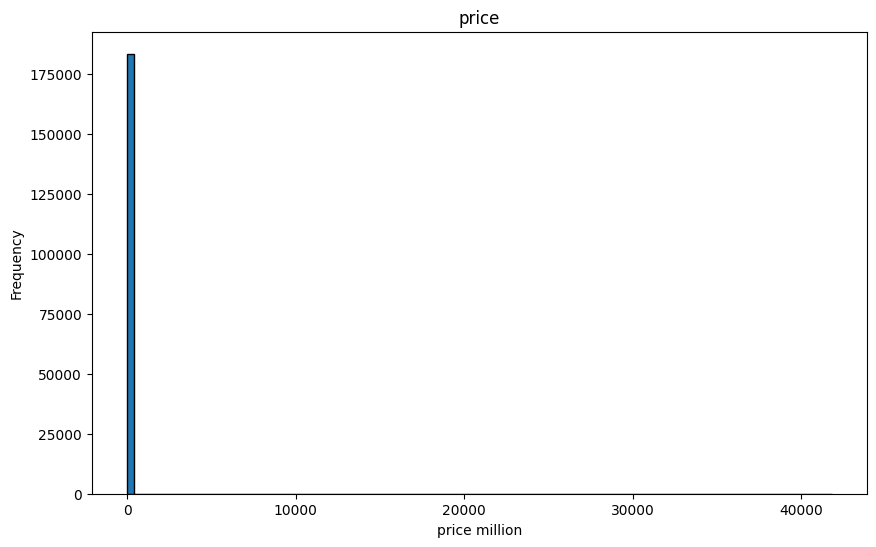

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['price_created_at'].dropna(), bins=100, edgecolor='black')
plt.title('price')
plt.xlabel('price million')
plt.ylabel('Frequency')
plt.show()

In [ ]:
Q1 = df['price_created_at'].quantile(0.25)
Q3 = df['price_created_at'].quantile(0.75)

# Calculate Interquartile Range
IQR = Q3 - Q1

# Determine bounds for outliers (commonly 1.5 * IQR is used)
lower_bound = Q1 - 1 * IQR
upper_bound = Q3 + 2 * IQR

# Filter out outliers
df = df[(df['price_created_at'] >= lower_bound) & (df['price_created_at'] <= upper_bound)]

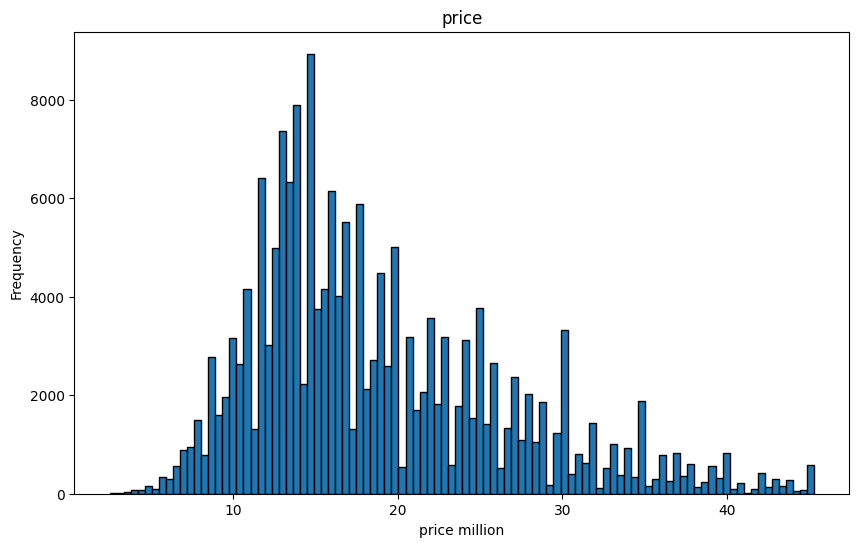

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['price_created_at'].dropna(), bins=100, edgecolor='black')
plt.title('price')
plt.xlabel('price million')
plt.ylabel('Frequency')
plt.show()

In [ ]:
price_created_at_max = df['price_created_at'].max()
price_created_at_max

45.3

In [ ]:
price_created_at_min = df['price_created_at'].min()
price_created_at_min

2.5

##Négyzetméter ár 'nmAr' célváltozó létrehozása. A balkon területe 0,5-ös szórzóval súlyozva.

In [ ]:
df['property_area'].isna().sum()

0

In [ ]:
property_area_max = df['property_area'].max()
property_area_max

70.0

In [ ]:
property_area_min = df['property_area'].min()
property_area_min

0.0

In [ ]:
df = df[df['property_area'] != 0]

In [ ]:
df['balcony_area'].isna().sum()

7524

In [ ]:
df['balcony_area'] = df['balcony_area'].fillna(0)

<ipython-input-361-89283f34cb4c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['balcony_area'] = df['balcony_area'].fillna(0)


In [ ]:
df['nmAr'] = (1000000 * df['price_created_at'] / (df['property_area'] + df['balcony_area'] * 0.5))

<ipython-input-362-d228c17b6124>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['nmAr'] = (1000000 * df['price_created_at'] / (df['property_area'] + df['balcony_area'] * 0.5))


In [ ]:
df.head()


,county,city,district,postcode,property_type,property_subtype,property_condition_type,property_floor,building_floor_count,view_type,orientation,garden_access,heating_type,elevator_type,room_cnt,small_room_cnt,created_at,property_area,balcony_area,price_created_at,ad_view_cnt,active_days,nmAr
0,Budapest,Budapest IV.,4.0,NaN,flat,prefabricated panel flat (for sale),good,3,10,garden view,east,NaN,NaN,yes,1.0,1.0,2015-02-09,35.0,0.0,9.5,702.0,23.0,271428.571429
1,Budapest,Budapest XIV.,14.0,1147.0,flat,brick flat (for sale),novel,ground floor,NaN,NaN,NaN,NaN,"gas furnace, circulating hot water",NaN,1.0,0.0,2015-02-09,35.0,0.0,11.2,42.0,6.0,320000.000000
2,Budapest,Budapest XIV.,14.0,NaN,flat,brick flat (for sale),medium,4,NaN,NaN,NaN,NaN,konvection gas burner,NaN,2.0,0.0,2015-02-09,50.0,0.0,14.5,504.0,96.0,290000.000000
3,Budapest,Budapest II.,2.0,1024.0,flat,brick flat (for sale),novel,basement,NaN,street view,NaN,NaN,konvection gas burner,yes,1.0,1.0,2015-02-09,50.0,0.0,15.3,39.0,1.0,306000.000000
4,Budapest,Budapest XII.,12.0,1126.0,flat,brick flat (for sale),good,ground floor,NaN,garden view,NaN,NaN,"gas furnace, circulating hot water",none,1.0,2.0,2015-02-09,50.0,0.0,17.9,114.0,27.0,358000.000000


In [ ]:
df = df[df['nmAr'] <= 1500000]

In [ ]:
nmAr_max = df['nmAr'].max()
nmAr_max

1500000.0

In [ ]:
df = df[df['nmAr'] >= 100000]

In [ ]:
nmAr_min = df['nmAr'].min()
nmAr_min

100000.0

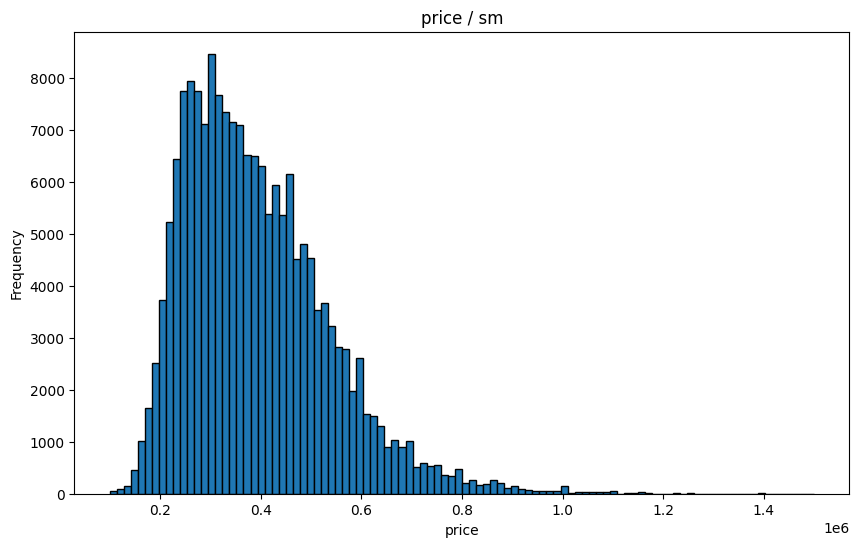

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['nmAr'].dropna(), bins=100, edgecolor='black')
plt.title('price / sm')
plt.xlabel('price')
plt.ylabel('Frequency')
plt.show()

In [ ]:
df.shape

(180371, 23)

##Kerület NaN értékek ellenőrzése


In [ ]:
print(df['district'].isna().sum())
print(df['city'].isna().sum())

1281
1281


Mivel a kerület egy különösen fontos tényező a célváltozó becslésében, viszont csak az adatok kb. 0,005%-a nem tartalmazza, ezeket eltávolítom

In [ ]:
df = df.dropna(subset=['district'])

In [ ]:
df['city'].isna().sum()

0

##Kerületi átlagár létrehozása

In [ ]:
district_average = df.groupby('district')['nmAr'].mean().copy()

In [ ]:
district_average

district
1.0     535732.804348
2.0     501418.069779
3.0     356631.852138
4.0     300014.865030
5.0     679420.287379
6.0     512602.784828
7.0     437966.116162
8.0     342655.840772
9.0     426991.611425
10.0    267793.675055
11.0    430801.451109
12.0    489728.870508
13.0    433806.475068
14.0    363420.287835
15.0    277675.485882
16.0    328789.418395
17.0    283157.091049
18.0    272118.111113
19.0    259832.969120
20.0    241687.767438
21.0    230411.868511
22.0    305253.501957
23.0    237664.381543
Name: nmAr, dtype: float64

In [ ]:
df['atlag_nmAr'] = df['district'].map(district_average)

<ipython-input-375-ea4a4d44ca57>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['atlag_nmAr'] = df['district'].map(district_average)


In [ ]:
df.head()

,county,city,district,postcode,property_type,property_subtype,property_condition_type,property_floor,building_floor_count,view_type,orientation,garden_access,heating_type,elevator_type,room_cnt,small_room_cnt,created_at,property_area,balcony_area,price_created_at,ad_view_cnt,active_days,nmAr,atlag_nmAr
0,Budapest,Budapest IV.,4.0,NaN,flat,prefabricated panel flat (for sale),good,3,10,garden view,east,NaN,NaN,yes,1.0,1.0,2015-02-09,35.0,0.0,9.5,702.0,23.0,271428.571429,300014.865030
1,Budapest,Budapest XIV.,14.0,1147.0,flat,brick flat (for sale),novel,ground floor,NaN,NaN,NaN,NaN,"gas furnace, circulating hot water",NaN,1.0,0.0,2015-02-09,35.0,0.0,11.2,42.0,6.0,320000.000000,363420.287835
2,Budapest,Budapest XIV.,14.0,NaN,flat,brick flat (for sale),medium,4,NaN,NaN,NaN,NaN,konvection gas burner,NaN,2.0,0.0,2015-02-09,50.0,0.0,14.5,504.0,96.0,290000.000000,363420.287835
3,Budapest,Budapest II.,2.0,1024.0,flat,brick flat (for sale),novel,basement,NaN,street view,NaN,NaN,konvection gas burner,yes,1.0,1.0,2015-02-09,50.0,0.0,15.3,39.0,1.0,306000.000000,501418.069779
4,Budapest,Budapest XII.,12.0,1126.0,flat,brick flat (for sale),good,ground floor,NaN,garden view,NaN,NaN,"gas furnace, circulating hot water",none,1.0,2.0,2015-02-09,50.0,0.0,17.9,114.0,27.0,358000.000000,489728.870508


##county
Ezt a változót elhagyhatjuk.

In [ ]:
df['county'].value_counts(dropna = False)

Budapest    179090
Name: county, dtype: int64

In [ ]:
df = df.drop('county', axis=1)

##city
Ez a változó redundáns a 'district' értékkel, elhagyható.

In [ ]:
df['city'].value_counts(dropna = False)

Budapest XIV.      20070
Budapest XIII.     19731
Budapest XI.       15822
Budapest VII.      14310
Budapest III.      13132
Budapest VIII.     13003
Budapest VI.       10114
Budapest IX.        8844
Budapest IV.        7875
Budapest II.        7251
Budapest X.         6914
Budapest XV.        6859
Budapest V.         5085
Budapest XII.       5045
Budapest XXI.       4576
Budapest XVIII.     4427
Budapest XX.        3783
Budapest XIX.       3623
Budapest I.         3024
Budapest XVII.      2097
Budapest XVI.       1864
Budapest XXII.      1407
Budapest XXIII.      234
Name: city, dtype: int64

In [ ]:
df = df.drop('city', axis=1)

##garden_access
Ha nincs külön megadva, feltételezzük, hogy nincs. Mivel ez bináris, célszerű lesz 1 és 0 értékekre cserélni.

In [ ]:
df['garden_access'].value_counts(dropna = False)

NaN     139244
none     33506
yes       6340
Name: garden_access, dtype: int64

In [ ]:
df['garden_access'] = df['garden_access'].fillna('none')

In [ ]:
df['garden_access'] = df['garden_access'].apply(lambda x: 1.0 if x == 'yes' else 0.0)

##property_floor
Lehetne ordinális, tehát érdemes numerikus értékekre változtatni, ahol a 'ground floor' (földszint értéke 0, a 'mezzanine' (magasföldszint) értéke 0.5, a '10 plus' értéke 11, és a 'basement' (pince) értéke -1 lesz.  

In [ ]:
df['property_floor'].value_counts(dropna = False)

1                  33237
2                  29162
ground floor       28551
3                  24442
4                  14682
NaN                 8564
mezzanine floor     8550
5                   7870
6                   5709
7                   4273
8                   3974
10                  3921
9                   3888
10 plus             1217
basement            1050
Name: property_floor, dtype: int64

In [ ]:
df['property_floor'] = df['property_floor'].apply(lambda x: 0.0 if x == 'ground floor' else x)
df['property_floor'] = df['property_floor'].apply(lambda x: 0.5 if x == 'mezzanine floor' else x)
df['property_floor'] = df['property_floor'].apply(lambda x: -1.0 if x == 'basement' else x)
df['property_floor'] = df['property_floor'].apply(lambda x: 11.0 if x == '10 plus' else x)

In [ ]:
df['property_floor'] = pd.to_numeric(df['property_floor'], errors='coerce')
property_floor_median = df['property_floor'].median()
property_floor_median

2.0

A NaN értékek kezelésére két ötletem van: az egyik, hogy vesszük a legnagyobb számban előforduló értéket, ami a 1. emelet, a másik, hogy az emelet mediánjával dolgozom, ami az esetünkben 2. Az utóbbit választom.


In [ ]:
df['property_floor'] = df['property_floor'].fillna(property_floor_median)
df['property_floor'] = pd.to_numeric(df['property_floor'], errors='coerce')


In [ ]:
df['property_floor'].value_counts(dropna = False)

 2.0     37726
 1.0     33237
 0.0     28551
 3.0     24442
 4.0     14682
 0.5      8550
 5.0      7870
 6.0      5709
 7.0      4273
 8.0      3974
 10.0     3921
 9.0      3888
 11.0     1217
-1.0      1050
Name: property_floor, dtype: int64

##small_room_cnt
Feltételezem, hogy ha nincs megadva, akkor nincs félszoba, ezért a NaN értékeket nullázom. Az ötnél nagyobb szobaszámú adatokra külön ránézek. A -1 szobaszámot elírásnak tekintem és 1-re állítom.

In [ ]:
df['small_room_cnt'].value_counts(dropna = False)


 0.0     102838
 1.0      54799
 2.0      19935
 3.0        890
 NaN        574
 4.0         32
 5.0          7
 8.0          3
 11.0         2
 21.0         2
 10.0         2
 23.0         1
 12.0         1
 47.0         1
 18.0         1
-1.0          1
 20.0         1
Name: small_room_cnt, dtype: int64

In [ ]:
df['small_room_cnt'] = df['small_room_cnt'].fillna(0.0)
df['small_room_cnt'] = df['small_room_cnt'].apply(lambda x: 1 if x < 0 else x)

In [ ]:
df_small_room = df[df['small_room_cnt'] >= 5]
df_small_room.head()

,district,postcode,property_type,property_subtype,property_condition_type,property_floor,building_floor_count,view_type,orientation,garden_access,heating_type,elevator_type,room_cnt,small_room_cnt,created_at,property_area,balcony_area,price_created_at,ad_view_cnt,active_days,nmAr,atlag_nmAr
7178,5.0,1055.0,flat,brick flat (for sale),renewed,4.0,6,street view,south,0.0,central heating,yes,2.0,5.0,2015-03-02,60.0,0.0,27.5,142.0,14.0,4.583333e+05,679420.287379
13856,11.0,1111.0,flat,brick flat (for sale),renewed,1.0,7,street view,east,0.0,district heating,yes,1.0,5.0,2015-03-23,50.0,0.0,24.9,860.0,53.0,4.980000e+05,430801.451109
14758,8.0,1084.0,flat,brick flat (for sale),good,2.0,2,NaN,NaN,0.0,other,NaN,1.0,18.0,2015-03-25,25.0,0.0,6.5,3675.0,206.0,2.600000e+05,342655.840772
14920,5.0,1054.0,flat,brick flat (for sale),good,0.0,3,courtyard view,NaN,0.0,konvection gas burner,yes,1.0,20.0,2015-03-25,35.0,0.0,19.0,422.0,3.0,5.428571e+05,679420.287379
16089,1.0,NaN,flat,prefabricated panel flat (for sale),missing_info,2.0,NaN,NaN,NaN,0.0,NaN,NaN,12.0,12.0,2015-03-30,10.0,0.0,12.0,24.0,3.0,1.200000e+06,535732.804348


Meglepő módon már az 5 kis szoba számot feltűntető hirdetések sem tűnnek helyes adatnak (a négyzetméterrel összevetve). Mivel ilyenből kevés van, ezektől inkább megszabadulok.

In [ ]:
df = df[df['small_room_cnt'] < 5]

##room_cnt
NaN nincs. Az ötnél nagyobb szobaszámú adatokra külön ránézek. A -1 szobaszámot elírásnak tekintem és 1-re állítom.



In [ ]:
df['room_cnt'].value_counts(dropna = False)

1.0      103537
2.0       66540
3.0        8151
0.0         650
4.0         143
5.0          18
20.0          6
11.0          4
10.0          3
6.0           3
46.0          2
88.0          1
21.0          1
62.0          1
56.0          1
63.0          1
66.0          1
35.0          1
215.0         1
32.0          1
36.0          1
12.0          1
77.0          1
Name: room_cnt, dtype: int64

In [ ]:
df_room = df[df['room_cnt'] >= 5]
df_room.head()

,district,postcode,property_type,property_subtype,property_condition_type,property_floor,building_floor_count,view_type,orientation,garden_access,heating_type,elevator_type,room_cnt,small_room_cnt,created_at,property_area,balcony_area,price_created_at,ad_view_cnt,active_days,nmAr,atlag_nmAr
4263,8.0,NaN,flat,brick flat (for sale),good,0.0,NaN,courtyard view,NaN,0.0,electric,NaN,5.0,0.0,2015-02-21,45.0,0.0,10.9,153.0,37.0,242222.222222,342655.840772
5925,8.0,1085.0,flat,brick flat (for sale),good,2.0,NaN,street view,NaN,0.0,konvection gas burner,none,10.0,0.0,2015-02-26,40.0,0.0,15.5,279.0,18.0,387500.000000,342655.840772
7828,8.0,NaN,flat,brick flat (for sale),missing_info,0.0,NaN,NaN,NaN,0.0,electric,NaN,5.0,0.0,2015-03-03,45.0,0.0,10.9,89.0,31.0,242222.222222,342655.840772
10439,9.0,1095.0,flat,brick flat (for sale),new_construction,0.0,6,courtyard view,south-east,0.0,central heating with own meter,yes,11.0,0.0,2015-03-11,35.0,7.0,17.0,246.0,28.0,441558.441558,426991.611425
10679,3.0,NaN,flat,brick flat (for sale),new_construction,7.0,8,panoramic,south-west,0.0,central heating with own meter,yes,12.0,1.0,2015-03-12,55.0,9.0,24.1,196.0,14.0,405042.016807,356631.852138


Az 5 szobaszámot feltűntető hirdetések sem tűnnek helyes adatnak (a négyzetméterrel összevetve). Mivel ilyenekből is kevés van, ezektől is megszabadulok.

In [ ]:
df = df[df['room_cnt'] < 5]

In [ ]:
room_count_max = df['room_cnt'].max()
room_count_max

4.0

##room_cnt + small_room_cnt = 0
Mivel a szobaszám fontos adat a célváltozó becsléséhez, megnézem, hogy hány olyan eset van, ahol az összesített szobaszám nem éri el az 1-et. Ezeket eltávolítom.

In [ ]:
no_room = df[(df['room_cnt'] + df['small_room_cnt']) < 1]

In [ ]:
no_room.head()

,district,postcode,property_type,property_subtype,property_condition_type,property_floor,building_floor_count,view_type,orientation,garden_access,heating_type,elevator_type,room_cnt,small_room_cnt,created_at,property_area,balcony_area,price_created_at,ad_view_cnt,active_days,nmAr,atlag_nmAr
52882,7.0,NaN,flat,brick flat (for sale),can_move_in,1.0,3,courtyard view,NaN,0.0,"gas furnace, circulating hot water",none,0.0,0.0,2015-07-12,60.0,0.0,20.5,667.0,16.0,341666.666667,437966.116162
65723,22.0,NaN,flat,brick flat (for sale),renewed,0.0,3,garden view,south-west,0.0,"gas furnace, circulating hot water",none,0.0,0.0,2015-08-23,40.0,0.0,13.8,612.0,135.0,345000.000000,305253.501957
92579,8.0,NaN,flat,brick flat (for sale),good,0.0,2,courtyard view,south-west,0.0,electric,none,0.0,0.0,2015-10-28,10.0,0.0,3.6,186.0,16.0,360000.000000,342655.840772
93021,2.0,1023.0,flat,brick flat (for sale),can_move_in,2.0,2,garden view,south,0.0,konvection gas burner,none,0.0,0.0,2015-10-29,55.0,3.0,30.0,893.0,78.0,530973.451327,501418.069779
95039,1.0,1016.0,flat,brick flat (for sale),novel,0.0,NaN,NaN,NaN,0.0,konvection gas burner,NaN,0.0,0.0,2015-11-04,15.0,0.0,10.5,147.0,20.0,700000.000000,535732.804348


In [ ]:
df = df[(df['room_cnt'] + df['small_room_cnt']) >= 1]

##building_floor_count
A épület emeletszámának hiányzó adatára az egyik lehetséges becslés, ha a property_floor értékét kapják meg (amennyiben az nem pince vagy félemelet). Ha ez az érték nem áll rendelkezésre, adhatjuk a ertékek mediánját.

In [ ]:
df['building_floor_count'].value_counts(dropna = False)

NaN             95152
4               19485
10              17943
3               17771
2                8011
5                7197
6                3716
7                2552
1                2223
more than 10     1978
9                1515
8                1467
Name: building_floor_count, dtype: int64

In [ ]:
df['building_floor_count'] = pd.to_numeric(df['building_floor_count'], errors='coerce')

<ipython-input-401-8a2fd39f46d3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['building_floor_count'] = pd.to_numeric(df['building_floor_count'], errors='coerce')


In [ ]:
df['building_floor_count'] = df['building_floor_count'].apply(lambda x: 11.0 if x == 'more than 10' else x)

<ipython-input-402-63cabb922ddb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['building_floor_count'] = df['building_floor_count'].apply(lambda x: 11.0 if x == 'more than 10' else x)


In [ ]:
df['building_floor_count'] = df['building_floor_count'].fillna(df['property_floor'])

In [ ]:
building_floor_median = df['building_floor_count'].median()
building_floor_median

3.0

In [ ]:
df['building_floor_count'] = df['building_floor_count'].apply(lambda x: building_floor_median if x == -1 else x)

In [ ]:
df['building_floor_count'] = df['building_floor_count'].apply(lambda x: building_floor_median if x == 0.5 else x)

In [ ]:
df['building_floor_count'].value_counts(dropna = False)

3.0     36360
2.0     29316
4.0     26941
1.0     20065
10.0    20023
0.0     15361
5.0     11339
6.0      6684
7.0      4685
9.0      3549
8.0      3491
11.0     1196
Name: building_floor_count, dtype: int64

##elevator_type
Tudomásom szerint 4 szintnél magasabb épületekben kötelező a lift, a NaN értékeket az épület emeletszáma alapján jósolom be.

In [ ]:
df['elevator_type'].value_counts(dropna = False)

yes     79190
none    67270
NaN     32550
Name: elevator_type, dtype: int64

In [ ]:
df['elevator_type'] = df['elevator_type'].apply(lambda x: 1.0 if x == 'yes' else x)
df['elevator_type'] = df['elevator_type'].apply(lambda x: 0.0 if x == 'none' else x)

In [ ]:
df.loc[(df['building_floor_count'] >= 5) & (df['elevator_type'].isna()), 'elevator_type'] = 1.0

In [ ]:
df['elevator_type'] = df['elevator_type'].fillna(0.0)

In [ ]:
df['elevator_type'].value_counts(dropna = False)

0.0    95613
1.0    83397
Name: elevator_type, dtype: int64

##view_type
A NaN értékek nagyon nagy számban vannak jelen (45.25%), így ezt az adatot nem próbálom megbecsülni, inkább kiveszem a feature-k közül.


In [ ]:
df['view_type'].value_counts(dropna = False)

NaN               80937
street view       39302
garden view       25300
courtyard view    21979
panoramic         11492
Name: view_type, dtype: int64

In [ ]:
df = df.drop('view_type', axis=1)

##property_condition_type
Ezt az adatot érdemes ordinális skálaként kezelni, az alábbi értékekkel:<br>
New construction – Új építésű: 7<br>
Renewed – Felújított: 6<br>
Novel – Újszerű: 5<br>
Good – Jó: 4<br>
Medium – Közepes: 3<br>
Can move in – Beköltözhető: 2<br>
To be renovated – Felújítandó: 1<br>
Under construction – Félkész: 0<br>
Missing info – Nincs adat<br>
Utóbbit nagyvonalúan kiveszem az adathalmazból, mivel megbecsülése nehézkes.

In [ ]:
df['property_condition_type'].value_counts(dropna = False)

good                  61013
novel                 35190
renewed               27918
medium                25451
to_be_renovated       14124
missing_info           7804
new_construction       6454
can_move_in            1027
under_construction       29
Name: property_condition_type, dtype: int64

In [ ]:
df = df[df['property_condition_type'] != 'missing_info']

In [ ]:
df['property_condition_type'] = df['property_condition_type'].apply(lambda x: 7.0 if x == 'new_construction' else x)
df['property_condition_type'] = df['property_condition_type'].apply(lambda x: 6.0 if x == 'renewed' else x)
df['property_condition_type'] = df['property_condition_type'].apply(lambda x: 5.0 if x == 'novel' else x)
df['property_condition_type'] = df['property_condition_type'].apply(lambda x: 4.0 if x == 'good' else x)
df['property_condition_type'] = df['property_condition_type'].apply(lambda x: 3.0 if x == 'medium' else x)
df['property_condition_type'] = df['property_condition_type'].apply(lambda x: 2.0 if x == 'can_move_in' else x)
df['property_condition_type'] = df['property_condition_type'].apply(lambda x: 1.0 if x == 'to_be_renovated' else x)
df['property_condition_type'] = df['property_condition_type'].apply(lambda x: 0.0 if x == 'under_construction' else x)

In [ ]:
df['property_condition_type'].value_counts(dropna = False)

4.0    61013
5.0    35190
6.0    27918
3.0    25451
1.0    14124
7.0     6454
2.0     1027
0.0       29
Name: property_condition_type, dtype: int64

##postcode
Az irányítószám fontos feature lehet, mivel finomabb 'felbontást' ad, mint a kerület. A város+kerület megadja az első három számjegyet. A negyedik számjegyre jó becslést adhatna a városrész jellege, például az, hogy kertes vagy vagy lakótelep, de ezzel csak azt érnénk el, hogy az erre vonatkozó feature-öket belekódolnánk egy másik változóba is. Ennél jobb megoldásnak tűnik, ha a NaN értékek becsült irányítószámainak utolsó számjegyét a nem használt 0 számjegyre cseréljük. A meglévő valós irányítószámokkal valamivel így is nagyobb lesz az információtartalmuk mint pusztán a kerület számának.

In [ ]:
df['postcode'].value_counts(dropna = False)

NaN       63005
1039.0     3137
1135.0     3038
1134.0     2306
1144.0     2250
          ...  
1215.0       44
1046.0       37
1239.0       12
1110.0        5
1185.0        4
Name: postcode, Length: 162, dtype: int64

In [ ]:
df.loc[df['postcode'].isna(), 'postcode'] = df['district'].apply(lambda x: 1000 + 10 * x)

##property_subtype
Itt látható egy 'for rent' bejegyzés, azt töröljük, mert tévesen került a táblázatba. Ugyanígy teszünk a 2 'terraced house' bejegyzéssel, mert ez a feature végeredményben egy tégla-panel flagként működhet. A NaN értékek egy részének becslésére használuk az emeletszámot úgy, a 10 emeleteseket panelnek tekintjük. A hetedik emeletnél magasabban lévő lakásokkal is így teszünk. A maradékot elhagyjuk az adatokból.

In [ ]:
df['property_subtype'].value_counts(dropna = False)

brick flat (for sale)                  124149
prefabricated panel flat (for sale)     43608
NaN                                      3446
terraced house                              2
prefabricated panel flat (for rent)         1
Name: property_subtype, dtype: int64

In [ ]:
df = df[df['property_subtype'] != 'terraced house']

In [ ]:
df = df[df['property_subtype'] != 'prefabricated panel flat (for rent)']

In [ ]:
df.loc[(df['building_floor_count'] == 10) & (df['property_subtype'].isna()), 'property_subtype'] = 'prefabricated panel flat (for sale)'

In [ ]:
df.loc[(df['property_floor'] >= 7) & (df['property_subtype'].isna()), 'property_subtype'] = 'prefabricated panel flat (for sale)'

In [ ]:
df = df.dropna(subset=['property_subtype'])

In [ ]:
df['property_subtype'] = df['property_subtype'].apply(lambda x: 0.0 if x == 'brick flat (for sale)' else 1.0)

<ipython-input-427-3d7adf67542b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['property_subtype'] = df['property_subtype'].apply(lambda x: 0.0 if x == 'brick flat (for sale)' else 1.0)


In [ ]:
df = df.rename(columns={'property_subtype': 'panel_flag'})

In [ ]:
df['panel_flag'].value_counts(dropna = False)

0.0    124149
1.0     44501
Name: panel_flag, dtype: int64

##property_type
Csak 'flat' bejegyzés található benne, tehát ez volt a szűrő a megkapott adatbázis generálásához. Töröljük.

In [ ]:
df['property_type'].value_counts(dropna = False)

flat    168650
Name: property_type, dtype: int64

In [ ]:
df = df.drop('property_type', axis=1)

##orientation
Elég sok a NaN érték, emiatt nem vagyok benne biztos, hogy használni fogom, mert az hiányzó értékek becslése nehézkes. Egyébként lehetne belőle ordinális skálát csinálni, ahol a legjobb értékeket a déli fekvésű világos lakások kapják, majd a dél-kelet és dél-nyugat a következő értéket... stb. A NaN vagy kaphat egy nullás értéket, vagy az értékek mediánját.  

In [ ]:
df['orientation'].value_counts(dropna = False)

NaN           63294
east          21421
south-west    20007
west          19220
south-east    15618
south         14427
north-east     6934
north-west     5545
north          2184
Name: orientation, dtype: int64

In [ ]:
df['orientation'] = df['orientation'].apply(lambda x: 5.0 if x == 'south' else x)
df['orientation'] = df['orientation'].apply(lambda x: 4.0 if x == 'south-west' else x)
df['orientation'] = df['orientation'].apply(lambda x: 4.0 if x == 'south-east' else x)
df['orientation'] = df['orientation'].apply(lambda x: 3.0 if x == 'west' else x)
df['orientation'] = df['orientation'].apply(lambda x: 3.0 if x == 'east' else x)
df['orientation'] = df['orientation'].apply(lambda x: 2.0 if x == 'north-east' else x)
df['orientation'] = df['orientation'].apply(lambda x: 2.0 if x == 'north-west' else x)
df['orientation'] = df['orientation'].apply(lambda x: 1.0 if x == 'north' else x)


In [ ]:
orient_mean = df['orientation'][df['orientation'].notna()].median()
orient_mean

3.0

In [ ]:
df['orientation'] = df['orientation'].fillna(3)

In [ ]:
df['orientation'].value_counts(dropna = False)

3.0    103935
4.0     35625
5.0     14427
2.0     12479
1.0      2184
Name: orientation, dtype: int64

##heating_type
A NaN értékeket a panellakások esetében távfűtésre cserélem, mert panel esetén ez a legelterjedtebb. A maradék NaN-t gázkonvektorra cserélem, mert nem panel esetén az a legelterjedtebb.  

In [ ]:
df['heating_type'].value_counts(dropna = False)

konvection gas burner                 47197
gas furnace, circulating hot water    31816
district heating                      27988
NaN                                   22429
central heating with own meter        18145
central heating                       11383
electric                               4627
tile stove (gas)                       2839
other                                  1979
fan-coil                                225
gas furnace                              21
gas + solar                               1
Name: heating_type, dtype: int64

In [ ]:
df.loc[(df['panel_flag'] == 1) & (df['heating_type'].isna()), 'heating_type'] = 'district heating'
df['heating_type'] = df['heating_type'].fillna('konvection gas burner')

In [ ]:
df['heating_type'] = df['heating_type'].apply(lambda x: 'convection_gas' if x == 'konvection gas burner' else x)
df['heating_type'] = df['heating_type'].apply(lambda x: 'gas_furnace_circulation' if x == 'gas furnace, circulating hot water' else x)
df['heating_type'] = df['heating_type'].apply(lambda x: 'district_heat' if x == 'district heating' else x)
df['heating_type'] = df['heating_type'].apply(lambda x: 'central_meter' if x == 'central heating with own meter' else x)
df['heating_type'] = df['heating_type'].apply(lambda x: 'central' if x == 'central heating' else x)
df['heating_type'] = df['heating_type'].apply(lambda x: 'electric' if x == 'electric' else x)
df['heating_type'] = df['heating_type'].apply(lambda x: 'tile_stove' if x == 'tile stove (gas)' else x)
df['heating_type'] = df['heating_type'].apply(lambda x: 'other' if x == 'other' else x)
df['heating_type'] = df['heating_type'].apply(lambda x: 'fan_coil' if x == 'fan-coil' else x)
df['heating_type'] = df['heating_type'].apply(lambda x: 'gas_furnace' if x == 'gas furnace' else x)
df['heating_type'] = df['heating_type'].apply(lambda x: 'gas_solar' if x == 'gas + solar' else x)

In [ ]:
df['heating_type'].value_counts(dropna = False)

convection_gas             54533
district_heat              43081
gas_furnace_circulation    31816
central_meter              18145
central                    11383
electric                    4627
tile_stove                  2839
other                       1979
fan_coil                     225
gas_furnace                   21
gas_solar                      1
Name: heating_type, dtype: int64

##ad_view_cnt & active_days
Ezeket nem használuk

In [ ]:
df.drop(['ad_view_cnt', 'active_days'], axis=1, inplace=True)

##district dummies

In [ ]:
district_dummies = pd.get_dummies(df['district'], prefix='district_')
df = pd.concat([df, district_dummies], axis=1)

##heating_type dummies

In [ ]:
heating_dummies = pd.get_dummies(df['heating_type'], prefix='heat_')
df = pd.concat([df, heating_dummies], axis=1)

##created_at
Kiszámoltam a daynum-ot (hány nap telt el az első nap óta az adott rekord időpontjában), majd modulo 7


In [ ]:
df['created_at'].value_counts()

2015-10-20    831
2016-01-12    796
2015-10-06    668
2015-06-04    639
2015-10-05    599
             ... 
2016-08-26     18
2015-12-24     16
2016-08-29      8
2016-08-28      3
2016-08-27      2
Name: created_at, Length: 568, dtype: int64

In [ ]:
df['date'] = pd.to_datetime(df['created_at'])
df['daynum'] = (df['date'] - df['date'].min()).dt.days
df['daynum'].drop_duplicates().values

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [ ]:
df['created_at_day'] = df['daynum'] % 7
df['created_at_day'].value_counts()

1    33206
2    31065
3    29030
0    28433
4    25579
6    10872
5    10465
Name: created_at_day, dtype: int64

##Data check

In [ ]:
df

,district,postcode,panel_flag,property_condition_type,property_floor,building_floor_count,orientation,garden_access,heating_type,elevator_type,room_cnt,small_room_cnt,created_at,property_area,balcony_area,price_created_at,nmAr,atlag_nmAr,district__1.0,district__2.0,district__3.0,district__4.0,district__5.0,district__6.0,district__7.0,district__8.0,district__9.0,district__10.0,district__11.0,district__12.0,district__13.0,district__14.0,district__15.0,district__16.0,district__17.0,district__18.0,district__19.0,district__20.0,district__21.0,district__22.0,district__23.0,heat__central,heat__central_meter,heat__convection_gas,heat__district_heat,heat__electric,heat__fan_coil,heat__gas_furnace,heat__gas_furnace_circulation,heat__gas_solar,heat__other,heat__tile_stove,date,daynum,created_at_day
0,4.0,1040.0,1.0,4.0,3.0,10.0,3.0,0.0,district_heat,1.0,1.0,1.0,2015-02-09,35.0,0.0,9.5,2.714286e+05,300014.865030,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2015-02-09,0,0
1,14.0,1147.0,0.0,5.0,0.0,0.0,3.0,0.0,gas_furnace_circulation,0.0,1.0,0.0,2015-02-09,35.0,0.0,11.2,3.200000e+05,363420.287835,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2015-02-09,0,0
2,14.0,1140.0,0.0,3.0,4.0,4.0,3.0,0.0,convection_gas,0.0,2.0,0.0,2015-02-09,50.0,0.0,14.5,2.900000e+05,363420.287835,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2015-02-09,0,0
3,2.0,1024.0,0.0,5.0,-1.0,3.0,3.0,0.0,convection_gas,1.0,1.0,1.0,2015-02-09,50.0,0.0,15.3,3.060000e+05,501418.069779,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2015-02-09,0,0
4,12.0,1126.0,0.0,4.0,0.0,0.0,3.0,0.0,gas_furnace_circulation,0.0,1.0,2.0,2015-02-09,50.0,0.0,17.9,3.580000e+05,489728.870508,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2015-02-09,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183560,7.0,1076.0,0.0,3.0,0.0,0.0,4.0,0.0,electric,0.0,1.0,0.0,2016-08-29,30.0,0.0,11.0,3.666667e+05,437966.116162,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2016-08-29,567,0
183561,7.0,1070.0,0.0,1.0,2.0,2.0,3.0,0.0,convection_gas,0.0,2.0,0.0,2016-08-29,45.0,0.0,20.5,4.555556e+05,437966.116162,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2016-08-29,567,0
183562,4.0,1040.0,0.0,6.0,0.0,1.0,5.0,0.0,convection_gas,0.0,1.0,0.0,2016-08-29,40.0,0.0,8.5,2.125000e+05,300014.865030,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2016-08-29,567,0
183563,4.0,1040.0,1.0,6.0,1.0,4.0,5.0,0.0,district_heat,0.0,2.0,1.0,2016-08-29,65.0,4.0,18.9,2.820896e+05,300014.865030,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2016-08-29,567,0


In [ ]:
df.isna().any().any()

False

In [ ]:
df.columns[df.dtypes == 'float64']

Index(['district', 'postcode', 'panel_flag', 'property_condition_type',
       'property_floor', 'building_floor_count', 'orientation',
       'garden_access', 'elevator_type', 'room_cnt', 'small_room_cnt',
       'property_area', 'balcony_area', 'price_created_at', 'nmAr',
       'atlag_nmAr'],
      dtype='object')

In [ ]:
df.columns[(df.dtypes == 'object')].isna().sum()

0

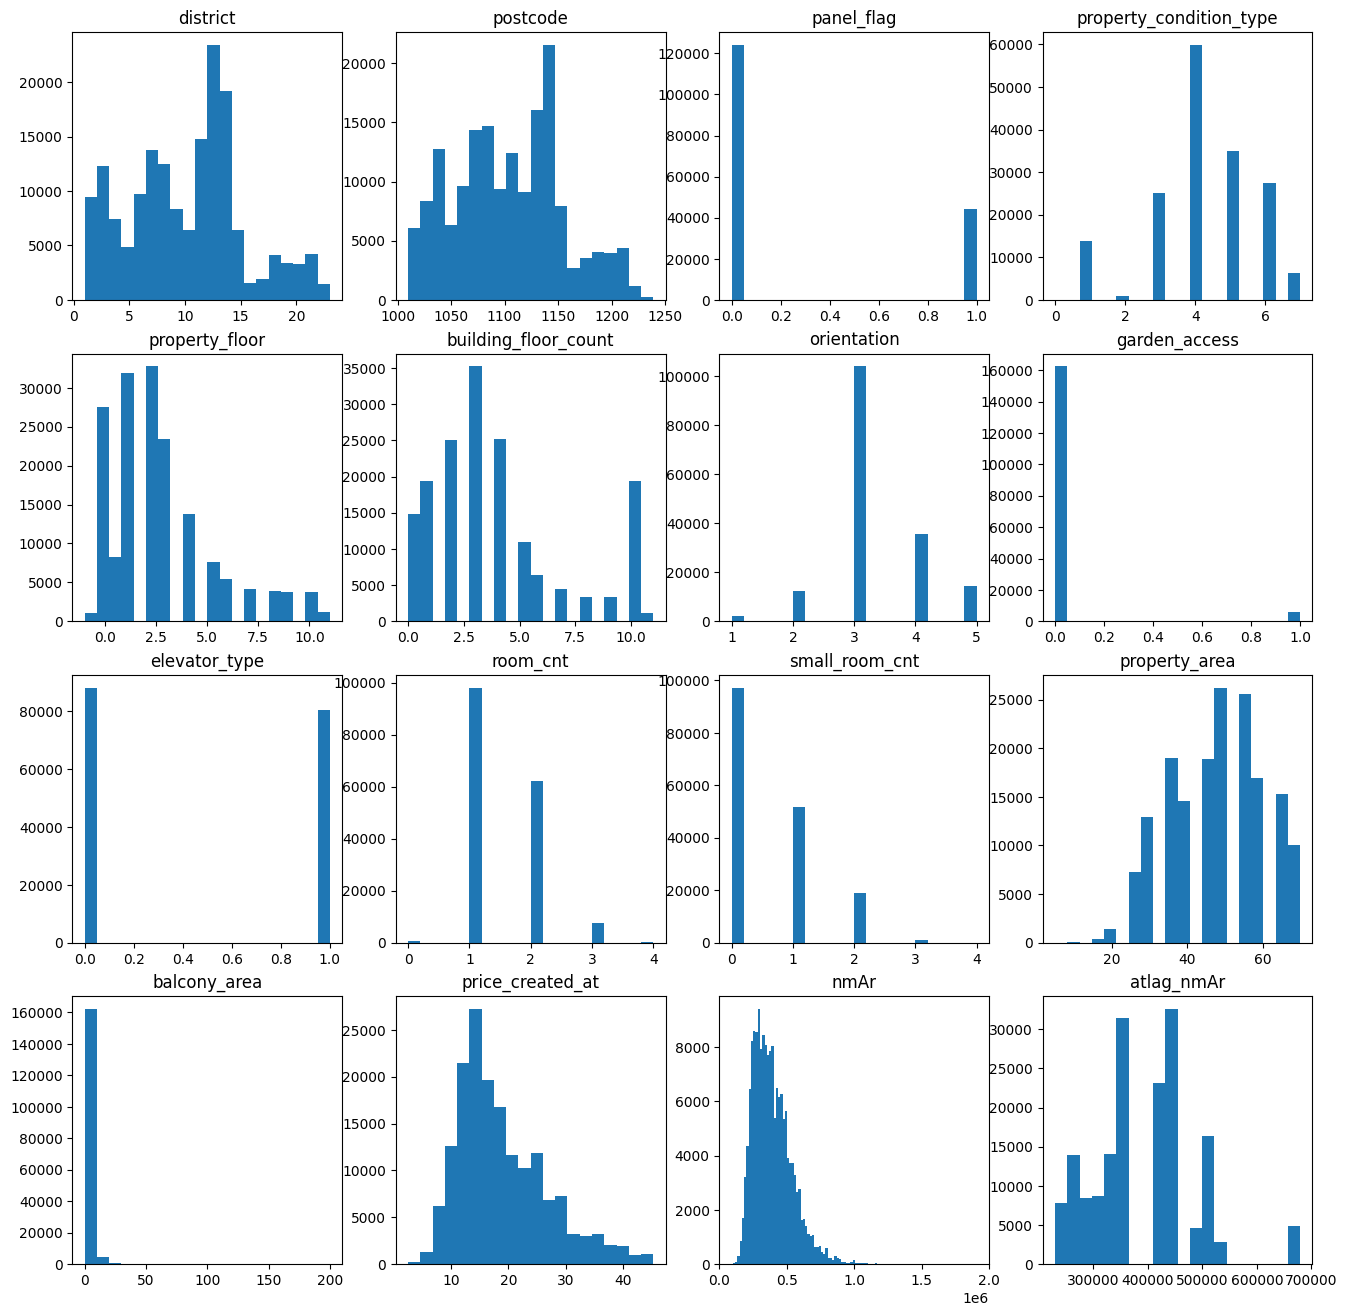

In [ ]:
from math import ceil

fig, ax = plt.subplots(4,4,figsize=(16,16))
non_cat_features = df.columns[df.dtypes == 'float64'].tolist()
rowNum = -1

for idx,feature in enumerate(non_cat_features):
    if idx %4 == 0:
        rowNum += 1
    binsNum = 20
    if(feature == 'nmAr'):
        ax[rowNum, idx%4].set_xlim(0, 2000000)
        binsNum = 80
    ax[rowNum, idx%4].hist(df[feature], bins=binsNum)
    ax[rowNum, idx%4].set_title(feature)

##Ár-trend követése
Ez a lépés azért fontos, mert a legtöbb modell feltételezi, hogy az egyes eloszlásbeli paraméterek (ami jelen esetben a nmAr mean-je) nem változnak az idő függvényében a minták között. Így ha növekvő trendet nem vennénk figyelembe, a modell más módon (feltételezhetően rosszabbul) tanulná meg az összefüggéseket a végeredmény rovására. Emiatt fontos, hogy a trendet követve dolgozzunk fel az adatokat.
Lineáris regresszióval kapott egyenes egyenlete alapján tudom a trendet követni. A megoldás lényege, hogy a linreg által fittelt egyenest (ami a becsült nmAr) felhasználjuk a valós nmAr értékek számításához az akábbi képlettel:

```
jelen_nmAr = (nmAr / linreg_prediktalt_nmAr) * jelenlegi_prediktalt_nmAr
```

(0.0, 1000000.0)

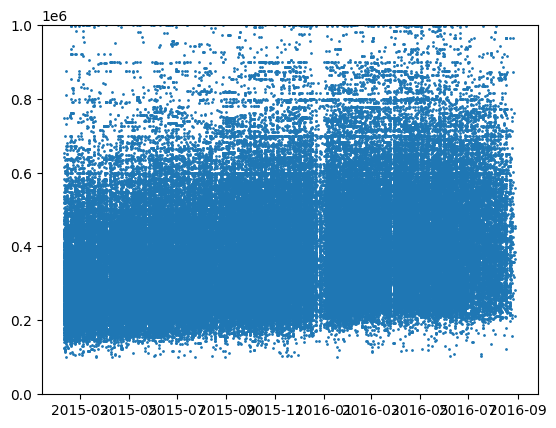

In [ ]:
plt.scatter(df['date'], df['nmAr'], s=1)
plt.ylim(0,1000000)

(0.0, 700000.0)

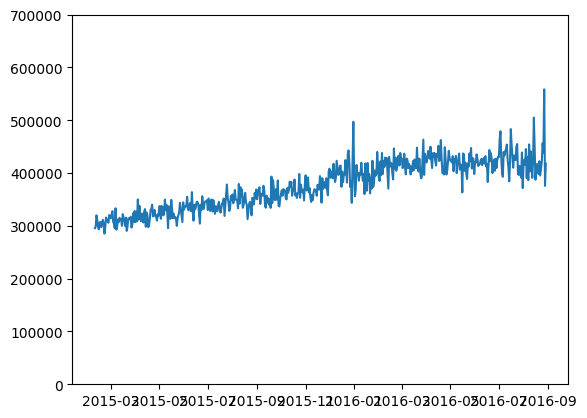

In [ ]:
stat = df.groupby('date',as_index=False).agg({"nmAr": 'median'})
plt.plot(stat['date'],stat['nmAr'])
plt.ylim(0,700000)

In [ ]:
stat.columns

Index(['date', 'nmAr'], dtype='object')

In [ ]:
stat['daynum'] = (stat['date'] - stat['date'].min()).dt.days

trend_linreg = LinearRegression()
trend_linreg.fit(stat[ ['daynum'] ], stat['nmAr'])

print(trend_linreg.coef_)
print(trend_linreg.intercept_)

[248.38625757]
305787.7758882079


In [ ]:
stat['trend_nmAr'] = trend_linreg.predict(stat[ ['daynum'] ])

(0.0, 700000.0)

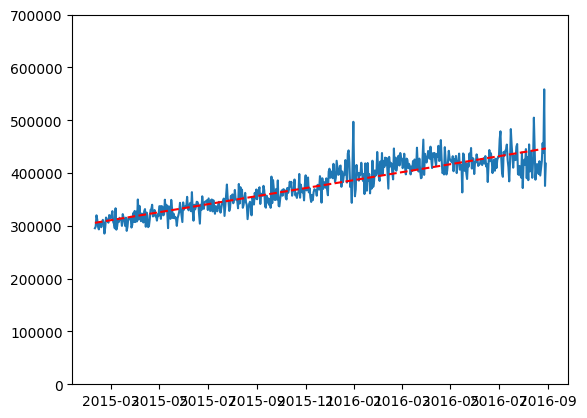

In [ ]:
plt.plot(stat['date'],stat['nmAr'])
plt.plot(stat['date'],stat['trend_nmAr'],'r--')
plt.ylim(0,700000)

In [ ]:
del stat['nmAr']
del stat['daynum']

In [ ]:
df = df.merge(stat,on="date",how="left")
df

,district,postcode,panel_flag,property_condition_type,property_floor,building_floor_count,orientation,garden_access,heating_type,elevator_type,room_cnt,small_room_cnt,created_at,property_area,balcony_area,price_created_at,nmAr,atlag_nmAr,district__1.0,district__2.0,district__3.0,district__4.0,district__5.0,district__6.0,district__7.0,district__8.0,district__9.0,district__10.0,district__11.0,district__12.0,district__13.0,district__14.0,district__15.0,district__16.0,district__17.0,district__18.0,district__19.0,district__20.0,district__21.0,district__22.0,district__23.0,heat__central,heat__central_meter,heat__convection_gas,heat__district_heat,heat__electric,heat__fan_coil,heat__gas_furnace,heat__gas_furnace_circulation,heat__gas_solar,heat__other,heat__tile_stove,date,daynum,created_at_day,trend_nmAr
0,4.0,1040.0,1.0,4.0,3.0,10.0,3.0,0.0,district_heat,1.0,1.0,1.0,2015-02-09,35.0,0.0,9.5,2.714286e+05,300014.865030,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2015-02-09,0,0,305787.775888
1,14.0,1147.0,0.0,5.0,0.0,0.0,3.0,0.0,gas_furnace_circulation,0.0,1.0,0.0,2015-02-09,35.0,0.0,11.2,3.200000e+05,363420.287835,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2015-02-09,0,0,305787.775888
2,14.0,1140.0,0.0,3.0,4.0,4.0,3.0,0.0,convection_gas,0.0,2.0,0.0,2015-02-09,50.0,0.0,14.5,2.900000e+05,363420.287835,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2015-02-09,0,0,305787.775888
3,2.0,1024.0,0.0,5.0,-1.0,3.0,3.0,0.0,convection_gas,1.0,1.0,1.0,2015-02-09,50.0,0.0,15.3,3.060000e+05,501418.069779,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2015-02-09,0,0,305787.775888
4,12.0,1126.0,0.0,4.0,0.0,0.0,3.0,0.0,gas_furnace_circulation,0.0,1.0,2.0,2015-02-09,50.0,0.0,17.9,3.580000e+05,489728.870508,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2015-02-09,0,0,305787.775888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168645,7.0,1076.0,0.0,3.0,0.0,0.0,4.0,0.0,electric,0.0,1.0,0.0,2016-08-29,30.0,0.0,11.0,3.666667e+05,437966.116162,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2016-08-29,567,0,446622.783931
168646,7.0,1070.0,0.0,1.0,2.0,2.0,3.0,0.0,convection_gas,0.0,2.0,0.0,2016-08-29,45.0,0.0,20.5,4.555556e+05,437966.116162,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2016-08-29,567,0,446622.783931
168647,4.0,1040.0,0.0,6.0,0.0,1.0,5.0,0.0,convection_gas,0.0,1.0,0.0,2016-08-29,40.0,0.0,8.5,2.125000e+05,300014.865030,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2016-08-29,567,0,446622.783931
168648,4.0,1040.0,1.0,6.0,1.0,4.0,5.0,0.0,district_heat,0.0,2.0,1.0,2016-08-29,65.0,4.0,18.9,2.820896e+05,300014.865030,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2016-08-29,567,0,446622.783931


#Modell train

##Feature készeletek

In [ ]:
df.columns.sort_values()

Index(['atlag_nmAr', 'balcony_area', 'building_floor_count', 'created_at',
       'created_at_day', 'date', 'daynum', 'district', 'district__1.0',
       'district__10.0', 'district__11.0', 'district__12.0', 'district__13.0',
       'district__14.0', 'district__15.0', 'district__16.0', 'district__17.0',
       'district__18.0', 'district__19.0', 'district__2.0', 'district__20.0',
       'district__21.0', 'district__22.0', 'district__23.0', 'district__3.0',
       'district__4.0', 'district__5.0', 'district__6.0', 'district__7.0',
       'district__8.0', 'district__9.0', 'elevator_type', 'garden_access',
       'heat__central', 'heat__central_meter', 'heat__convection_gas',
       'heat__district_heat', 'heat__electric', 'heat__fan_coil',
       'heat__gas_furnace', 'heat__gas_furnace_circulation', 'heat__gas_solar',
       'heat__other', 'heat__tile_stove', 'heating_type', 'nmAr',
       'orientation', 'panel_flag', 'postcode', 'price_created_at',
       'property_area', 'property_cond

In [ ]:
base_features = ['room_cnt', 'small_room_cnt', 'property_area', 'balcony_area', 'atlag_nmAr']

location_feature_sets = [
    ['district__1.0',
     'district__2.0',
     'district__3.0',
     'district__4.0',
     'district__5.0',
     'district__6.0',
     'district__7.0',
     'district__8.0',
     'district__9.0',
     'district__10.0',
     'district__11.0',
     'district__12.0',
     'district__13.0',
     'district__14.0',
     'district__15.0',
     'district__16.0',
     'district__17.0',
     'district__18.0',
     'district__19.0',
     'district__20.0',
     'district__21.0',
     'district__22.0',
     'district__23.0'],
    ['postcode'],
]

orientation_feature_sets = [
    ['orientation'],
]

heating_feature_sets = [
    ['heat__central',
     'heat__central_meter',
     'heat__convection_gas',
     'heat__district_heat',
     'heat__electric',
     'heat__fan_coil',
     'heat__gas_furnace',
     'heat__gas_furnace_circulation',
     'heat__gas_solar',
     'heat__other',
     'heat__tile_stove'],
]

quality_feature_sets = [
    ['property_condition_type',
     'panel_flag',
     'elevator_type',
     'garden_access',
     'building_floor_count',
     'property_floor'],
]

##Train

In [ ]:
def modelling(model,train_df,test_df, bemeno_valtozok, celvaltozo):
    model.fit(train_df[bemeno_valtozok], train_df[celvaltozo])
    test_df['tipp']=model.predict(test_df[bemeno_valtozok])
    return test_df

In [ ]:
def eval_function(model,df, tipp_oszlop_neve, target_oszlop_neve):
    mean_absolute_error = (abs(df[tipp_oszlop_neve]-df[target_oszlop_neve])).mean()

    MAPE=(abs((df[target_oszlop_neve] - df[tipp_oszlop_neve])/df[target_oszlop_neve])).mean()
    rmse =  np.sqrt( ( (df[tipp_oszlop_neve]-df[target_oszlop_neve])**2 ).mean() )

    df['tipp_arany']=df[target_oszlop_neve]/df[tipp_oszlop_neve]
    prom_ratio=df[  (df['tipp_arany']>0.75 ) & (df['tipp_arany']<0.95)]

    print("\n--------------------------------")
    print(model)
    print("RMSE",rmse)
    print("MAE:",mean_absolute_error)
    print("MAPE:",MAPE)
    print("Ratio of promising results",len(prom_ratio)/len(df))
    return rmse, mean_absolute_error, MAPE, len(prom_ratio)/len(df)

##Modellek: LinReg, GradientBoostingReg, MLPReg

In [ ]:
from sklearn.neural_network import MLPRegressor

model_linreg = LinearRegression()
model_gbm = GradientBoostingRegressor(n_estimators=100,max_depth=4,random_state=42)
model_nn = MLPRegressor(random_state=42, max_iter=1000, hidden_layer_sizes=(50,10), solver="adam", activation="relu", learning_rate="adaptive", learning_rate_init=0.001, alpha=0.0001)

models = [model_linreg, model_gbm, model_nn]

In [ ]:
from sklearn.model_selection import KFold

# Eredmenyek struktúrája: [legjobb_ertek, [feature-set], model, CV sorszáma]
best_rmse = [1000000000000,[],np.nan,0]
best_mae = [1000000000000,[],np.nan,0]
best_mape = [1000000000000,[],np.nan,0]


# Modell valasztas
for model in models:

    # Feature set-ek
      for loc in location_feature_sets:
          for orient in orientation_feature_sets:
              for heating in heating_feature_sets:
                    for quality in quality_feature_sets:

                          # Feature set
                          bemeno_valtozok = base_features + loc + orient + heating + quality
                          celvaltozo = ['nmAr']

                          # Cross-validation
                          kfold = KFold(n_splits=3)
                          results = []
                          for train_index, test_index in kfold.split(df):
                              train_df = df[bemeno_valtozok + celvaltozo].iloc[train_index]
                              test_df = df[bemeno_valtozok + celvaltozo].iloc[test_index]
                              modelling(model,train_df,test_df,bemeno_valtozok,'nmAr')
                              rmse, mean_absolute_error, mape, prom_ratio_ret = eval_function(model,test_df,'tipp','nmAr')
                              if rmse < best_rmse[0]:
                                  best_rmse = [rmse, bemeno_valtozok, model, len(results)]
                              if mean_absolute_error < best_mae[0]:
                                  best_mae = [mean_absolute_error, bemeno_valtozok, model, len(results)]
                              if mape < best_mape[0]:
                                  best_mape = [mape, bemeno_valtozok, model, len(results)]
                              results.append([rmse, mean_absolute_error, mape, prom_ratio_ret])


--------------------------------
LinearRegression()
RMSE 106880.83102978185
MAE: 86265.41689126968
MAPE: 0.27904896374774457
Ratio of promising results 0.45689026451073517

--------------------------------
LinearRegression()
RMSE 86690.68355767078
MAE: 61008.56217081369
MAPE: 0.15529862513508316
Ratio of promising results 0.3305761602362275

--------------------------------
LinearRegression()
RMSE 108432.99247106782
MAE: 78601.83084758082
MAPE: 0.16756647859056675
Ratio of promising results 0.120535078981073

--------------------------------
LinearRegression()
RMSE 107180.40052923185
MAE: 86344.8754468276
MAPE: 0.2800793568664829
Ratio of promising results 0.44929469733354677

--------------------------------
LinearRegression()
RMSE 87643.89428368791
MAE: 62117.289486122005
MAPE: 0.15888343518283699
Ratio of promising results 0.3289930092320828

--------------------------------
LinearRegression()
RMSE 108200.28201229275
MAE: 78838.64546366961
MAPE: 0.16872466357617652
Ratio of promisi

In [ ]:
with open('best_mae.txt', 'w') as file:
    for value in best_mae:
        file.write(f"{value}\n")

best_mae

[53445.26900475,
 ['room_cnt',
  'small_room_cnt',
  'property_area',
  'balcony_area',
  'atlag_nmAr',
  'postcode',
  'orientation',
  'heat__central',
  'heat__central_meter',
  'heat__convection_gas',
  'heat__district_heat',
  'heat__electric',
  'heat__fan_coil',
  'heat__gas_furnace',
  'heat__gas_furnace_circulation',
  'heat__gas_solar',
  'heat__other',
  'heat__tile_stove',
  'property_condition_type',
  'panel_flag',
  'elevator_type',
  'garden_access',
  'building_floor_count'],
 GradientBoostingRegressor(max_depth=4, random_state=42),
 1]

In [ ]:
with open('best_rmse.txt', 'w') as file:
    for value in best_rmse:
        file.write(f"{value}\n")

best_rmse

[78000.35560977571,
 ['room_cnt',
  'small_room_cnt',
  'property_area',
  'balcony_area',
  'atlag_nmAr',
  'postcode',
  'orientation',
  'heat__central',
  'heat__central_meter',
  'heat__convection_gas',
  'heat__district_heat',
  'heat__electric',
  'heat__fan_coil',
  'heat__gas_furnace',
  'heat__gas_furnace_circulation',
  'heat__gas_solar',
  'heat__other',
  'heat__tile_stove',
  'property_condition_type',
  'panel_flag',
  'elevator_type',
  'garden_access',
  'building_floor_count'],
 GradientBoostingRegressor(max_depth=4, random_state=42),
 1]

In [ ]:
with open('best_mape.txt', 'w') as file:
    for value in best_mape:
        file.write(f"{value}\n")

best_mape

[0.13401889090244665,
 ['room_cnt',
  'small_room_cnt',
  'property_area',
  'balcony_area',
  'atlag_nmAr',
  'postcode',
  'orientation',
  'heat__central',
  'heat__central_meter',
  'heat__convection_gas',
  'heat__district_heat',
  'heat__electric',
  'heat__fan_coil',
  'heat__gas_furnace',
  'heat__gas_furnace_circulation',
  'heat__gas_solar',
  'heat__other',
  'heat__tile_stove',
  'property_condition_type',
  'panel_flag',
  'elevator_type',
  'garden_access',
  'building_floor_count'],
 GradientBoostingRegressor(max_depth=4, random_state=42),
 1]

##Összefoglalás
Mindhárom mérőszámara a GradientBoostingRegressor teljesített a legjobban. A generált irányítószámok jobban teljesítettek, mint a kerület számokból készített dummy one hot kódolás. Teljesen egyértelmű, hogy még lehetne javítani az eredményeken, illetve érdemes lenne vizualizálni az eredményeket is.